In [403]:
from sklearn.decomposition import PCA
from sklearn import preprocessing
from PIL import Image, ImageDraw
import numpy as np
import matplotlib.pyplot as plt
from decimal import Decimal

%run utils.ipynb


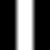
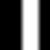
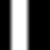
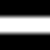
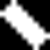
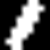

In [91]:
IMAGE_SIZE = 9
vert_bar_image = Image.new('L', (IMAGE_SIZE, IMAGE_SIZE))

center_pt = IMAGE_SIZE // 2
coords = [
    (center_pt - 1, 0),
    (center_pt + 1, IMAGE_SIZE - 1)
]
ImageDraw.Draw(vert_bar_image).rectangle(coords, outline=255, fill=255)

vert_bar_image2 = Image.new('L', (IMAGE_SIZE, IMAGE_SIZE))
coords = [
    (center_pt - 1 + 1, 0),
    (center_pt + 1 + 1, IMAGE_SIZE - 1)
]
ImageDraw.Draw(vert_bar_image2).rectangle(coords, outline=255, fill=255)

vert_bar_image3 = Image.new('L', (IMAGE_SIZE, IMAGE_SIZE))
coords = [
    (center_pt - 1 - 1, 0),
    (center_pt + 1 - 1, IMAGE_SIZE - 1)
]
ImageDraw.Draw(vert_bar_image3).rectangle(coords, outline=255, fill=255)

horz_bar_image = vert_bar_image.rotate(90)
diag_bar_image = vert_bar_image.rotate(45)
diag_bar_image2 = vert_bar_image.rotate(-30)

all_images = [vert_bar_image, vert_bar_image2, vert_bar_image3, horz_bar_image, diag_bar_image, diag_bar_image2]
display_images(list(map(lambda x: x.resize((50, 50)), all_images)))

In [92]:
def display_kernel_raw(kernel, precision=1):
    kernel = kernel.reshape(IMAGE_SIZE, IMAGE_SIZE)
    format_string = '{:4.' + str(precision) + 'f}'
    
    for r in kernel:
        s = ''
        for c in r:
            # s += ' ' + f'{c:4.1f}'
            s += ' ' + format_string.format(c)

        print(s)   


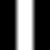
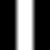
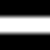

In [93]:
images_source = [vert_bar_image, vert_bar_image, horz_bar_image]
images_source_caps = np.zeros(len(images_source), dtype=np.int32)
SAMPLES_COUNT = 100
data = []
images = list(map(lambda x: np.array(x).ravel(), images_source))
random_indices = np.random.randint(len(images), size=SAMPLES_COUNT)

for i in random_indices:
    data.append(images[i])
    images_source_caps[i] += 1

data = np.array(data)
display_images(list(map(lambda x: x.resize((50, 50)), images_source)), captions=images_source_caps)

In [94]:
data.shape, np.unique(data)

((100, 81), array([  0, 255], dtype=uint8))

In [95]:
scaled_data = preprocessing.scale(data)

In [96]:
display_kernel_raw(preprocessing.scale(data)[0])

  0.0  0.0  0.0  0.9  0.9  0.9  0.0  0.0  0.0
  0.0  0.0  0.0  0.9  0.9  0.9  0.0  0.0  0.0
  0.0  0.0  0.0  0.9  0.9  0.9  0.0  0.0  0.0
 -0.9 -0.9 -0.9  0.0  0.0  0.0 -0.9 -0.9 -0.9
 -0.9 -0.9 -0.9  0.0  0.0  0.0 -0.9 -0.9 -0.9
 -0.9 -0.9 -0.9  0.0  0.0  0.0 -0.9 -0.9 -0.9
  0.0  0.0  0.0  0.9  0.9  0.9  0.0  0.0  0.0
  0.0  0.0  0.0  0.9  0.9  0.9  0.0  0.0  0.0
  0.0  0.0  0.0  0.9  0.9  0.9  0.0  0.0  0.0


In [97]:
display_kernel_raw(preprocessing.scale(data, axis=1)[0])

 -0.7 -0.7 -0.7  1.4  1.4  1.4 -0.7 -0.7 -0.7
 -0.7 -0.7 -0.7  1.4  1.4  1.4 -0.7 -0.7 -0.7
 -0.7 -0.7 -0.7  1.4  1.4  1.4 -0.7 -0.7 -0.7
 -0.7 -0.7 -0.7  1.4  1.4  1.4 -0.7 -0.7 -0.7
 -0.7 -0.7 -0.7  1.4  1.4  1.4 -0.7 -0.7 -0.7
 -0.7 -0.7 -0.7  1.4  1.4  1.4 -0.7 -0.7 -0.7
 -0.7 -0.7 -0.7  1.4  1.4  1.4 -0.7 -0.7 -0.7
 -0.7 -0.7 -0.7  1.4  1.4  1.4 -0.7 -0.7 -0.7
 -0.7 -0.7 -0.7  1.4  1.4  1.4 -0.7 -0.7 -0.7


In [98]:
display_kernel_raw(preprocessing.scale(data.T).T[0])

 -0.7 -0.7 -0.7  1.4  1.4  1.4 -0.7 -0.7 -0.7
 -0.7 -0.7 -0.7  1.4  1.4  1.4 -0.7 -0.7 -0.7
 -0.7 -0.7 -0.7  1.4  1.4  1.4 -0.7 -0.7 -0.7
 -0.7 -0.7 -0.7  1.4  1.4  1.4 -0.7 -0.7 -0.7
 -0.7 -0.7 -0.7  1.4  1.4  1.4 -0.7 -0.7 -0.7
 -0.7 -0.7 -0.7  1.4  1.4  1.4 -0.7 -0.7 -0.7
 -0.7 -0.7 -0.7  1.4  1.4  1.4 -0.7 -0.7 -0.7
 -0.7 -0.7 -0.7  1.4  1.4  1.4 -0.7 -0.7 -0.7
 -0.7 -0.7 -0.7  1.4  1.4  1.4 -0.7 -0.7 -0.7


In [99]:
pca = PCA() #svd_solver='randomized')
pca.fit(scaled_data)
pca_data = pca.transform(scaled_data)

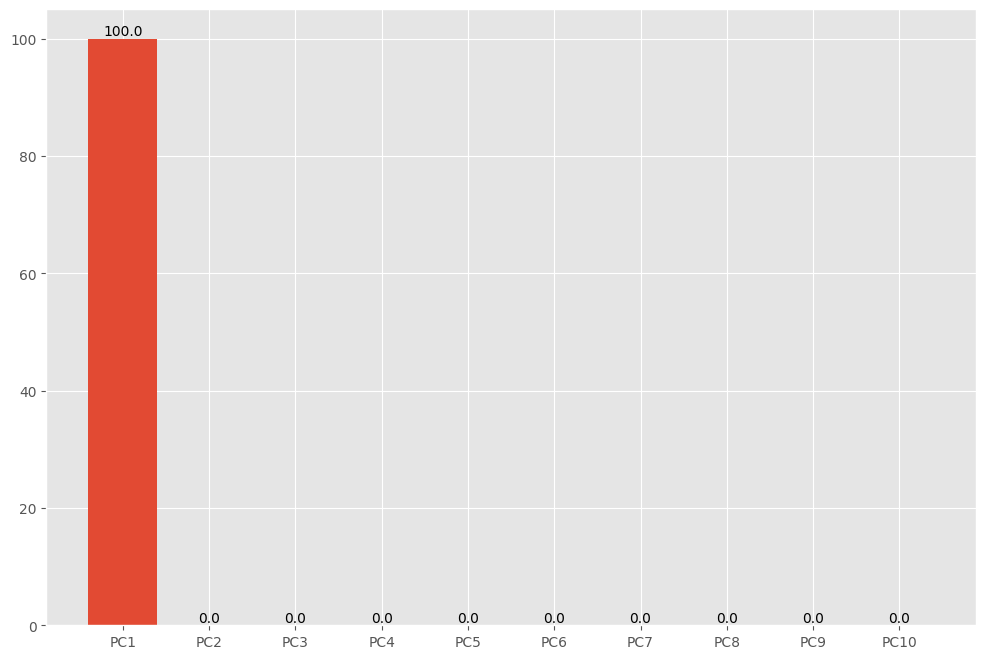

In [100]:
per_var = np.round(pca.explained_variance_ratio_ * 100, decimals=1)[:10]
per_var_names = [f'PC{i+1}' for i in range(len(per_var))]

p = plt.bar(per_var_names, per_var)
plt.bar_label(p, map(str, per_var))
plt.show()


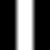

In [101]:
pc_imgs = []
pc_caps = []
evr_cumsum = np.cumsum(pca.explained_variance_ratio_)

for i, cumsum in zip(range(10), evr_cumsum):
    pc = pca.components_[i].copy()
    pc *= data.std(axis=0)
    pc += data.mean(axis=0)
    pc[pc < 127] = 0
    pc[pc > 0] = 255
    # display_kernel_raw(pc, 1)
    pc_imgs.append(Image.frombytes('L', size=(IMAGE_SIZE, IMAGE_SIZE), data=pc.astype(np.uint8)).resize((50, 50)))
    pc_caps.append(f'{pca.explained_variance_ratio_[i] * 100:.1f}')

    if cumsum >= 1:
        break

display_images(pc_imgs, captions=pc_caps)

In [102]:
scaled_data.shape, scaled_data[0].shape, pca.components_.shape

((100, 81), (81,), (81, 81))

In [103]:
random_indices

array([1, 1, 0, 0, 1, 2, 2, 1, 2, 2, 1, 1, 2, 2, 2, 1, 1, 0, 0, 2, 2, 2,
       1, 2, 2, 2, 1, 0, 1, 2, 0, 2, 1, 1, 2, 2, 1, 1, 0, 2, 1, 2, 1, 2,
       2, 0, 2, 2, 0, 1, 2, 0, 0, 0, 0, 2, 0, 1, 0, 2, 2, 1, 1, 2, 2, 1,
       2, 0, 0, 2, 2, 0, 1, 0, 0, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2, 0,
       2, 0, 0, 2, 2, 2, 2, 1, 1, 1, 1, 2])

In [104]:
z = np.round(scaled_data[1] @ pca.components_.T, decimals=2)
z

array([ 5.54,  0.  ,  0.  , -0.  ,  0.  ,  0.  , -0.  , -0.  , -0.  ,
        0.  , -0.  ,  0.  , -0.  , -0.  ,  0.  ,  0.  , -0.  ,  0.  ,
       -0.  , -0.  ,  0.  ,  0.  , -0.  ,  0.  ,  0.  ,  0.  , -0.  ,
       -0.  ,  0.  ,  0.  , -0.  ,  0.  , -0.  ,  0.  , -0.  ,  0.  ,
        0.  ,  0.  ,  0.  , -0.  ,  0.  , -0.  ,  0.  , -0.  , -0.  ,
       -0.  ,  0.  , -0.  ,  0.  , -0.  ,  0.  , -0.  ,  0.  , -0.  ,
        0.  ,  0.  , -0.  ,  0.  , -0.  ,  0.  ,  0.  , -0.  , -0.  ,
        0.  , -0.  ,  0.  , -0.  , -0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
        0.  ,  0.  ,  0.  , -0.  ,  0.  ,  0.  ,  0.  ,  0.  , -0.  ])

In [105]:
np.array_equal(np.round(scaled_data[0] @ pca.components_.T, decimals=3), np.round(pca_data[0], decimals=3))

True

In [106]:
display_kernel_raw(z @ pca.components_)

  0.0  0.0  0.0  0.9  0.9  0.9  0.0  0.0  0.0
  0.0  0.0  0.0  0.9  0.9  0.9  0.0  0.0  0.0
  0.0  0.0  0.0  0.9  0.9  0.9  0.0  0.0  0.0
 -0.9 -0.9 -0.9  0.0  0.0  0.0 -0.9 -0.9 -0.9
 -0.9 -0.9 -0.9  0.0  0.0  0.0 -0.9 -0.9 -0.9
 -0.9 -0.9 -0.9  0.0  0.0  0.0 -0.9 -0.9 -0.9
  0.0  0.0  0.0  0.9  0.9  0.9  0.0  0.0  0.0
  0.0  0.0  0.0  0.9  0.9  0.9  0.0  0.0  0.0
  0.0  0.0  0.0  0.9  0.9  0.9  0.0  0.0  0.0


In [107]:
display_kernel_raw(scaled_data[0], 1)

  0.0  0.0  0.0  0.9  0.9  0.9  0.0  0.0  0.0
  0.0  0.0  0.0  0.9  0.9  0.9  0.0  0.0  0.0
  0.0  0.0  0.0  0.9  0.9  0.9  0.0  0.0  0.0
 -0.9 -0.9 -0.9  0.0  0.0  0.0 -0.9 -0.9 -0.9
 -0.9 -0.9 -0.9  0.0  0.0  0.0 -0.9 -0.9 -0.9
 -0.9 -0.9 -0.9  0.0  0.0  0.0 -0.9 -0.9 -0.9
  0.0  0.0  0.0  0.9  0.9  0.9  0.0  0.0  0.0
  0.0  0.0  0.0  0.9  0.9  0.9  0.0  0.0  0.0
  0.0  0.0  0.0  0.9  0.9  0.9  0.0  0.0  0.0


In [108]:
np.round(pca_data[0], decimals=2)

array([ 5.54,  0.  ,  0.  , -0.  ,  0.  ,  0.  , -0.  , -0.  , -0.  ,
        0.  , -0.  ,  0.  , -0.  ,  0.  ,  0.  ,  0.  , -0.  ,  0.  ,
       -0.  , -0.  ,  0.  ,  0.  , -0.  ,  0.  ,  0.  ,  0.  , -0.  ,
       -0.  ,  0.  ,  0.  , -0.  ,  0.  , -0.  ,  0.  , -0.  ,  0.  ,
        0.  , -0.  , -0.  , -0.  ,  0.  , -0.  , -0.  , -0.  ,  0.  ,
       -0.  , -0.  ,  0.  , -0.  , -0.  ,  0.  ,  0.  , -0.  , -0.  ,
        0.  ,  0.  , -0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  , -0.  ,
        0.  , -0.  ,  0.  , -0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
        0.  ,  0.  ,  0.  , -0.  ,  0.  ,  0.  ,  0.  ,  0.  , -0.  ])

In [109]:
np.round(pca_data[1], decimals=2)

array([ 5.54,  0.  ,  0.  , -0.  ,  0.  ,  0.  , -0.  , -0.  , -0.  ,
        0.  , -0.  ,  0.  , -0.  ,  0.  ,  0.  ,  0.  , -0.  ,  0.  ,
       -0.  , -0.  ,  0.  ,  0.  , -0.  ,  0.  ,  0.  ,  0.  , -0.  ,
       -0.  ,  0.  ,  0.  , -0.  ,  0.  , -0.  ,  0.  , -0.  ,  0.  ,
        0.  , -0.  , -0.  , -0.  ,  0.  , -0.  , -0.  , -0.  ,  0.  ,
       -0.  , -0.  ,  0.  , -0.  , -0.  ,  0.  ,  0.  , -0.  , -0.  ,
        0.  ,  0.  , -0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  , -0.  ,
        0.  , -0.  ,  0.  , -0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
        0.  ,  0.  ,  0.  , -0.  ,  0.  ,  0.  ,  0.  ,  0.  , -0.  ])

In [110]:
np.round(pca_data[2], decimals=2)

array([ 5.54,  0.  ,  0.  , -0.  ,  0.  ,  0.  , -0.  , -0.  , -0.  ,
        0.  , -0.  ,  0.  , -0.  ,  0.  ,  0.  ,  0.  , -0.  ,  0.  ,
       -0.  , -0.  ,  0.  ,  0.  , -0.  ,  0.  ,  0.  ,  0.  , -0.  ,
       -0.  ,  0.  ,  0.  , -0.  ,  0.  , -0.  ,  0.  , -0.  ,  0.  ,
        0.  , -0.  , -0.  , -0.  ,  0.  , -0.  , -0.  , -0.  ,  0.  ,
       -0.  , -0.  ,  0.  , -0.  , -0.  ,  0.  ,  0.  , -0.  , -0.  ,
        0.  ,  0.  , -0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  , -0.  ,
        0.  , -0.  ,  0.  , -0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
        0.  ,  0.  ,  0.  , -0.  ,  0.  ,  0.  ,  0.  ,  0.  , -0.  ])

In [111]:
np.round(pca_data[3], decimals=2)

array([ 5.54,  0.  ,  0.  , -0.  ,  0.  ,  0.  , -0.  , -0.  , -0.  ,
        0.  , -0.  ,  0.  , -0.  ,  0.  ,  0.  ,  0.  , -0.  ,  0.  ,
       -0.  , -0.  ,  0.  ,  0.  , -0.  ,  0.  ,  0.  ,  0.  , -0.  ,
       -0.  ,  0.  ,  0.  , -0.  ,  0.  , -0.  ,  0.  , -0.  ,  0.  ,
        0.  , -0.  , -0.  , -0.  ,  0.  , -0.  , -0.  , -0.  ,  0.  ,
       -0.  , -0.  ,  0.  , -0.  , -0.  ,  0.  ,  0.  , -0.  , -0.  ,
        0.  ,  0.  , -0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  , -0.  ,
        0.  , -0.  ,  0.  , -0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
        0.  ,  0.  ,  0.  , -0.  ,  0.  ,  0.  ,  0.  ,  0.  , -0.  ])


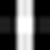
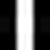
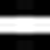
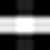
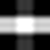
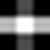
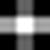
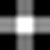
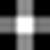
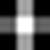
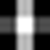
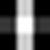
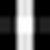
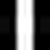
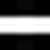
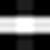
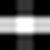

In [112]:
x = pca_data[0].copy()
x_imgs = []
x_caps = []

for i in range(-8, 9):
    x[0] = i
    k = x @ pca.components_
    k *= data.std(axis=0)
    k += data.mean(axis=0)
    # pc[pc < 127] = 0
    # pc[pc > 0] = 255
    x_imgs.append(Image.frombytes('L', size=(IMAGE_SIZE, IMAGE_SIZE), data=k.astype(np.uint8)).resize((50, 50)))
    x_caps.append(f'{i}')

display_images(x_imgs, captions=x_caps)

In [113]:
xy_data = []

for y in range(IMAGE_SIZE):
    for x in range(IMAGE_SIZE):
        i = y * IMAGE_SIZE + x
        samples_indices = np.argwhere(data[:,i] > 0)
        samples_indices = samples_indices.reshape(-1)

        for si in samples_indices:
            xy_data.append([x, y])

xy_data = np.array(xy_data)

In [114]:
xy_data

array([[3, 0],
       [3, 0],
       [3, 0],
       ...,
       [5, 8],
       [5, 8],
       [5, 8]], shape=(2700, 2))

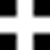

In [115]:
test_image = Image.new('L', size=(IMAGE_SIZE, IMAGE_SIZE))
test_image_draw = ImageDraw.Draw(test_image)

for xy in xy_data:
    test_image_draw.point(list(xy), fill=255)
    
test_image.resize((50, 50))

In [116]:
xy_data_scaled = preprocessing.scale(xy_data)
xy_pca = PCA()
xy_pca.fit(xy_data_scaled)

PCA()

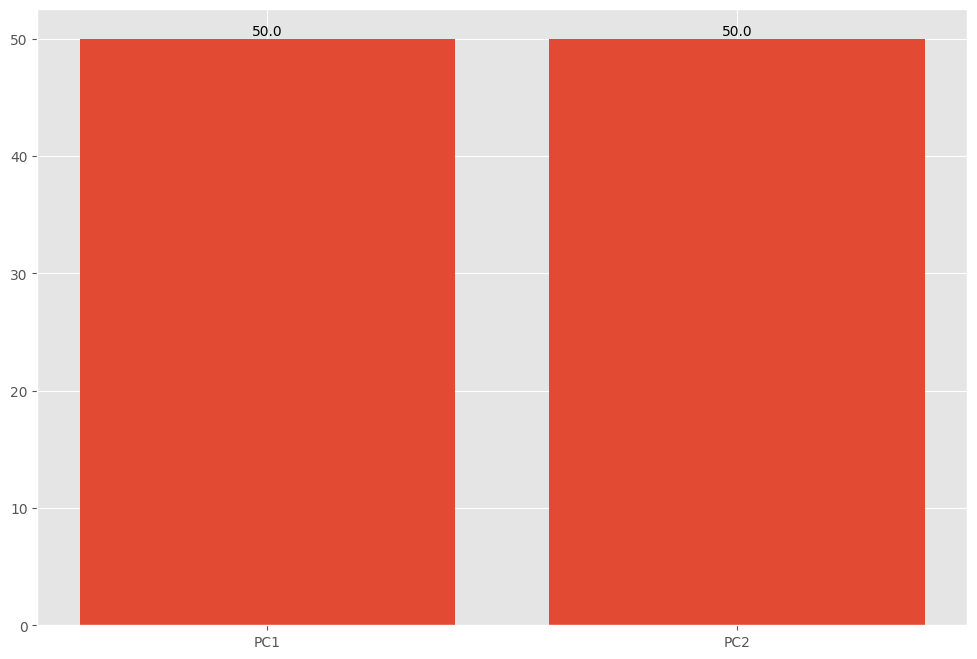

In [117]:
per_var = np.round(xy_pca.explained_variance_ratio_ * 100, decimals=1)[:10]
per_var_names = [f'PC{i+1}' for i in range(len(per_var))]

p = plt.bar(per_var_names, per_var)
plt.bar_label(p, map(str, per_var))
plt.show()


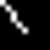
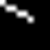

In [118]:
pc_imgs = []
pc_caps = []
evr_cumsum = np.cumsum(xy_pca.explained_variance_ratio_)

for i, cumsum in zip(range(10), evr_cumsum):
    pc = xy_pca.components_[i].copy()
    pc *= xy_data.std(axis=0)
    pc += xy_data.mean(axis=0)
    # pc[pc < 127] = 0
    # pc[pc > 0] = 255
    # display_kernel_raw(pc, 1)
    pc_img = Image.new('L', size=(IMAGE_SIZE, IMAGE_SIZE))
    pc_img_draw = ImageDraw.Draw(pc_img)
    pc_img_draw.line([(0, 0), tuple(pc)], fill=255)
    pc_imgs.append(pc_img.resize((50, 50)))
    pc_caps.append(f'{xy_pca.explained_variance_ratio_[i] * 100:.1f}')

    if cumsum >= 1:
        break

display_images(pc_imgs, captions=pc_caps)

In [119]:
for i in range(10 + 1):
    arr = [1] * i + [0] * (10 - i)
    arr = np.array(arr)
    print(f'{str(np.round(arr.astype(np.float32), decimals=1)):70} {arr.mean():6.2f} {arr.std():6.2f}')
    print(f'{str(np.round(preprocessing.scale(arr), decimals=2)):70} {preprocessing.scale(arr).mean():6.2f} {preprocessing.scale(arr).std():6.2f}\n')
    

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]                                          0.00   0.00
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]                                          0.00   0.00

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]                                          0.10   0.30
[ 3.   -0.33 -0.33 -0.33 -0.33 -0.33 -0.33 -0.33 -0.33 -0.33]           -0.00   1.00

[1. 1. 0. 0. 0. 0. 0. 0. 0. 0.]                                          0.20   0.40
[ 2.   2.  -0.5 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5]                     -0.00   1.00

[1. 1. 1. 0. 0. 0. 0. 0. 0. 0.]                                          0.30   0.46
[ 1.53  1.53  1.53 -0.65 -0.65 -0.65 -0.65 -0.65 -0.65 -0.65]           -0.00   1.00

[1. 1. 1. 1. 0. 0. 0. 0. 0. 0.]                                          0.40   0.49
[ 1.22  1.22  1.22  1.22 -0.82 -0.82 -0.82 -0.82 -0.82 -0.82]           -0.00   1.00

[1. 1. 1. 1. 1. 0. 0. 0. 0. 0.]                                          0.50   0.50
[ 1.  1.  1.  1.  1. -1. -1. -1. -1. -1.]                   

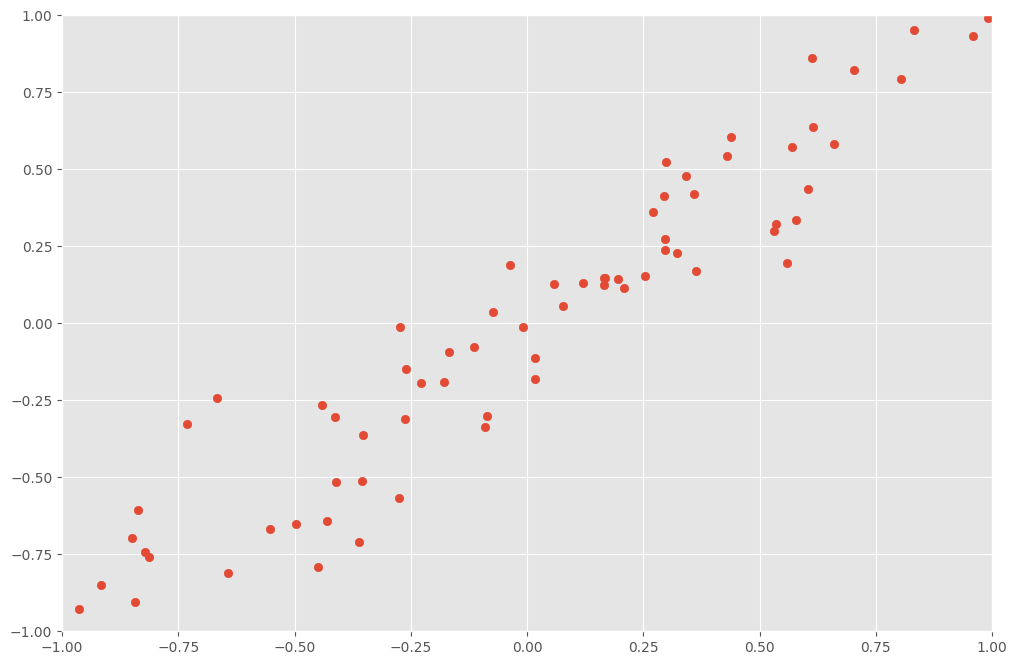

In [120]:
x = np.random.randn(100)
noise = np.random.randn(100) / 5
y = x + (noise - noise.mean())
# y = x + 0.5

plt.scatter(x, y)
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.show()

In [121]:
dataset = np.vstack((x, y)).T
dataset_norm = preprocessing.scale(dataset)
cov1 = (dataset_norm.T @ dataset_norm) / dataset.shape[0]
np.round(cov1, decimals=2)

array([[1.  , 0.98],
       [0.98, 1.  ]])

In [122]:
evc = np.linalg.eig(cov1).eigenvectors

In [123]:
dataset_norm_rot = (dataset_norm @ evc)
cov2 = (dataset_norm_rot.T @ dataset_norm_rot) / dataset.shape[0]
np.round(cov2, decimals=2)

array([[ 0.02, -0.  ],
       [-0.  ,  1.98]])

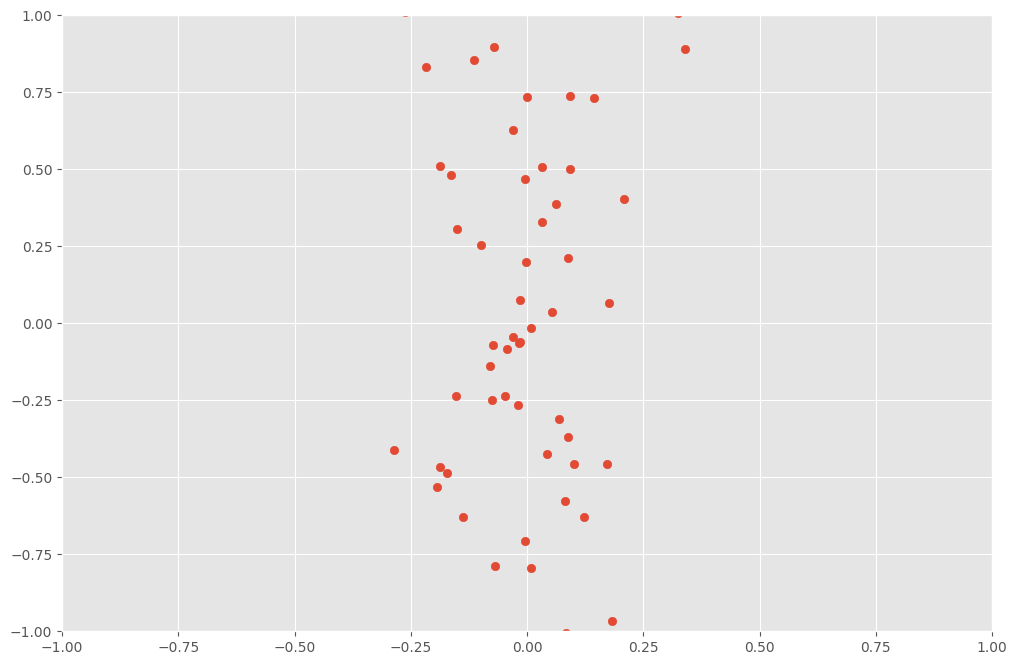

In [124]:
plt.scatter(dataset_norm_rot[:,0], dataset_norm_rot[:,1])
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.show()

In [125]:
np.round([dataset_norm_rot[:,0].mean(), dataset_norm_rot[:,1].mean()], decimals=3)

array([0., 0.])

In [126]:
np.round([dataset_norm_rot[:,0].std(), dataset_norm_rot[:,1].std()], decimals=3)

array([0.139, 1.407])

In [127]:
x = np.array([1, 1, 0, 0])
y = np.array([0, 0, 1, 1])
z = np.array([0, 0, 0, 1])
w = np.array([0, 0, 1, 0])
o = np.array([0, 0, 0, 0])
dataset = np.vstack((x, x, x, y, y, z, w, o)) 


# a = np.array([0, 1, 0, 0, 1, 0, 0, 1, 0])
# b = np.array([0, 0, 0, 1, 1, 1, 0, 0, 0])
# o = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0])
# dataset = np.vstack((a, b, a, b, a, b, a, a, a, b, a, a, a, b, o, o, o)) 

# x = np.array([1, 1])
# y = np.array([0, 0])
# dataset = None
# dataset = np.vstack((x, y)) 


In [128]:
dataset

array([[1, 1, 0, 0],
       [1, 1, 0, 0],
       [1, 1, 0, 0],
       [0, 0, 1, 1],
       [0, 0, 1, 1],
       [0, 0, 0, 1],
       [0, 0, 1, 0],
       [0, 0, 0, 0]])

In [129]:
dataset_norm = preprocessing.scale(dataset)
np.round(dataset_norm, decimals=2)

array([[ 1.29,  1.29, -0.77, -0.77],
       [ 1.29,  1.29, -0.77, -0.77],
       [ 1.29,  1.29, -0.77, -0.77],
       [-0.77, -0.77,  1.29,  1.29],
       [-0.77, -0.77,  1.29,  1.29],
       [-0.77, -0.77, -0.77,  1.29],
       [-0.77, -0.77,  1.29, -0.77],
       [-0.77, -0.77, -0.77, -0.77]])

In [130]:
(dataset_norm * dataset.std(axis=0)) + dataset.mean(axis=0)

array([[1., 1., 0., 0.],
       [1., 1., 0., 0.],
       [1., 1., 0., 0.],
       [0., 0., 1., 1.],
       [0., 0., 1., 1.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 0., 0.]])

In [131]:
cov1 = (dataset_norm.T @ dataset_norm) / dataset.shape[0]
np.round(cov1, decimals=2)

array([[ 1.  ,  1.  , -0.6 , -0.6 ],
       [ 1.  ,  1.  , -0.6 , -0.6 ],
       [-0.6 , -0.6 ,  1.  ,  0.47],
       [-0.6 , -0.6 ,  0.47,  1.  ]])

In [132]:
eig = np.linalg.eig(cov1)
evc = eig.eigenvectors
eva = eig.eigenvalues
np.round(evc, decimals=1), np.round(eva, decimals=2)

(array([[-0.6, -0.7, -0.4, -0. ],
        [-0.6,  0.7, -0.4, -0. ],
        [ 0.4, -0. , -0.6, -0.7],
        [ 0.4, -0. , -0.6,  0.7]]),
 array([ 2.96, -0.  ,  0.5 ,  0.53]))

In [133]:
np.round(((evc).T * dataset.std(axis=0) + dataset.mean(axis=0)).T, decimals=0)

array([[0., 0., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 1.]])

In [134]:
np.round(eig.eigenvalues, decimals=2)

array([ 2.96, -0.  ,  0.5 ,  0.53])

In [135]:
np.round([evc[:,0] @ evc[:,1].T, evc[:,0] @ evc[:,2].T, evc[:,0] @ evc[:,3].T], decimals=2)

array([ 0., -0.,  0.])

In [136]:
dataset_norm_rot = (dataset_norm @ evc)
cov2 = (dataset_norm_rot.T @ dataset_norm_rot) / dataset.shape[0]
np.round(cov2, decimals=2)

array([[2.96, 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.5 , 0.  ],
       [0.  , 0.  , 0.  , 0.53]])

In [137]:
dataset_norm_mapped = dataset_norm @ evc0
dataset_norm_restored = dataset_norm_mapped @ evc.T
dataset_norm_restored2 = (dataset_norm_restored * dataset.std(axis=0)) + dataset.mean(axis=0)
np.round(dataset_norm_restored2, decimals=0)

array([[ 0.,  1.,  0.,  0.],
       [ 0.,  1.,  0.,  0.],
       [ 0.,  1.,  0.,  0.],
       [-0.,  0.,  0.,  1.],
       [-0.,  0.,  0.,  1.],
       [ 1.,  0.,  1.,  0.],
       [ 1.,  0.,  1.,  0.],
       [ 1.,  1.,  1.,  0.]])

In [138]:
evc0 = evc.copy()

for i in range(1, evc0.shape[1]):
    evc0[:,i] = 0
    
evc0 = evc0 * dataset.std(axis=0)
evc0 += dataset.mean(axis=0)
np.round(evc0, decimals=0)

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.]])

In [139]:
dataset.mean(axis=0)

array([0.375, 0.375, 0.375, 0.375])

In [140]:
dataset

array([[1, 1, 0, 0],
       [1, 1, 0, 0],
       [1, 1, 0, 0],
       [0, 0, 1, 1],
       [0, 0, 1, 1],
       [0, 0, 0, 1],
       [0, 0, 1, 0],
       [0, 0, 0, 0]])

In [149]:
C = cov_mat(Y.T)
eVe, eVa = np.linalg.eig(C)

plt.scatter(Y[:, 0], Y[:, 1])

for e, v in zip(eVe, eVa.T):
    plt.plot([0, 3*np.sqrt(e)*v[0]], [0, 3*np.sqrt(e)*v[1]], 'k-', lw=2)

plt.title('Transformed Data')
plt.axis('equal');

NameError: name 'Y' is not defined

In [ ]:
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12, 8)

# Normal distributed x and y vector with mean 0 and standard deviation 1
x = np.clip(np.random.normal(0, 1, 500), -1, 1)
#y = np.random.normal(0, 1, 500)
y = np.sqrt(1 - np.pow(x, 2))
X = np.vstack((x, y)).T

plt.scatter(X[:, 0], X[:, 1])
plt.title('Generated Data')
plt.axis('equal');

In [148]:
# Covariance
def cov(x, y):
    xbar, ybar = x.mean(), y.mean()
    return np.sum((x - xbar)*(y - ybar))/(len(x) - 1)

# Covariance matrix
def cov_mat(X):
    return np.array([[cov(X[0], X[0]), cov(X[0], X[1])], \
                     [cov(X[1], X[0]), cov(X[1], X[1])]])

# Calculate covariance matrix 
np.round(cov_mat(X.T), decimals=2)

array([[0.48, 0.01],
       [0.01, 0.18]])

In [ ]:
# Center the matrix at the origin
X = X - np.mean(X, 0)

# Scaling matrix
sx, sy = 1.5, 1
Scale = np.array([[sx, 0], [0, sy]])

# Apply scaling matrix to X
#Y = X.dot(Scale)
Y = (Scale @ X.T).T

plt.scatter(Y[:, 0], Y[:, 1])
plt.title('Transformed Data')
plt.axis('equal')

# Calculate covariance matrix
np.round(cov_mat(Y.T), decimals=2)

In [ ]:
# Scaling matrix
sx, sy = 1, 0.5
Scale = np.array([[sx, 0], [0, sy]])

# Rotation matrix
theta = 1/6 * np.pi
c, s = np.cos(theta), np.sin(theta)
Rot = np.array([[c, -s], [s, c]])

# Transformation matrix
#T = Scale.dot(Rot)
T = Rot @ Scale
#T = Rot

# Apply transformation matrix to X
#Y = X.dot(T)
#Y = X @ T
#Y = (X @ T.T)
Y = (T @ X.T).T # the same as (X @ T.T)

# plt.scatter(X[:, 0], X[:, 1], c='b')

plt.scatter(Y[:, 0], Y[:, 1])
plt.title(f'Transformed Data {sx, sy, theta/np.pi}')
plt.axis('equal')

# plt.plot([0, Rot[:,0][0]], [0, Rot[:,0][1]], 'k-', lw=2)
# plt.plot([0, Rot[:,1][0]], [0, Rot[:,1][1]], 'k-', lw=2)

plt.plot([0, T[:,0][0]], [0, T[:,0][1]], 'k-', lw=2)
plt.plot([0, T[:,1][0]], [0, T[:,1][1]], 'k-', lw=2)

# plt.plot([0, 0.81], [0, 0.59], 'k-', lw=2)
# plt.plot([0, -0.12], [0, 0.16], 'k-', lw=2)

# Calculate covariance matrix
np.round([T, Rot, cov_mat(Y.T)], decimals=2)

In [ ]:
import io
from IPython.display import HTML

animation = []

for angle in range(0, 210, 5):
    # Scaling matrix
    sx, sy = 0.7, 3.4
    Scale = np.array([[sx, 0], [0, sy]])
    
    # Rotation matrix
    theta = (angle / 100) * np.pi
    c, s = np.cos(theta), np.sin(theta)
    Rot = np.array([[c, -s], [s, c]])
    
    # Transformation matrix
    T = Rot @ Scale
    
    # Apply transformation matrix to X
    Y = (T @ X.T).T # the same as (X @ T.T)

    plt.clf()
    #plt.scatter(X[:, 0], X[:, 1], c='b')
    
    plt.scatter(Y[:, 0], Y[:, 1])
    plt.title(f'Transformed Data {sx, sy, theta/np.pi}')
    plt.axis('equal')

    plt.plot([0, Rot[:,0][0]], [0, Rot[:,0][1]], 'b', lw=2)
    plt.plot([0, Rot[:,1][0]], [0, Rot[:,1][1]], 'b', lw=2)

    
    plt.plot([0, T[:,0][0]], [0, T[:,0][1]], 'k-', lw=2)
    plt.plot([0, T[:,1][0]], [0, T[:,1][1]], 'k-', lw=2)

    inmemoryfile = io.BytesIO()
    plt.savefig(inmemoryfile)

    img = Image.open(inmemoryfile)
    animation.append(img)

plt.clf()
animation[0].save("animation.gif", save_all=True, append_images=animation[1:], duration=500)

In [ ]:
HTML('<img src="animation.gif">')

In [ ]:
C = cov_mat(Y.T)
eVe, eVa = np.linalg.eig(C)

plt.scatter(Y[:, 0], Y[:, 1])

for e, v in zip(eVe, eVa.T):
    plt.plot([0, 3*np.sqrt(e)*v[0]], [0, 3*np.sqrt(e)*v[1]], 'k-', lw=2)
    
plt.title('Transformed Data')
plt.axis('equal');


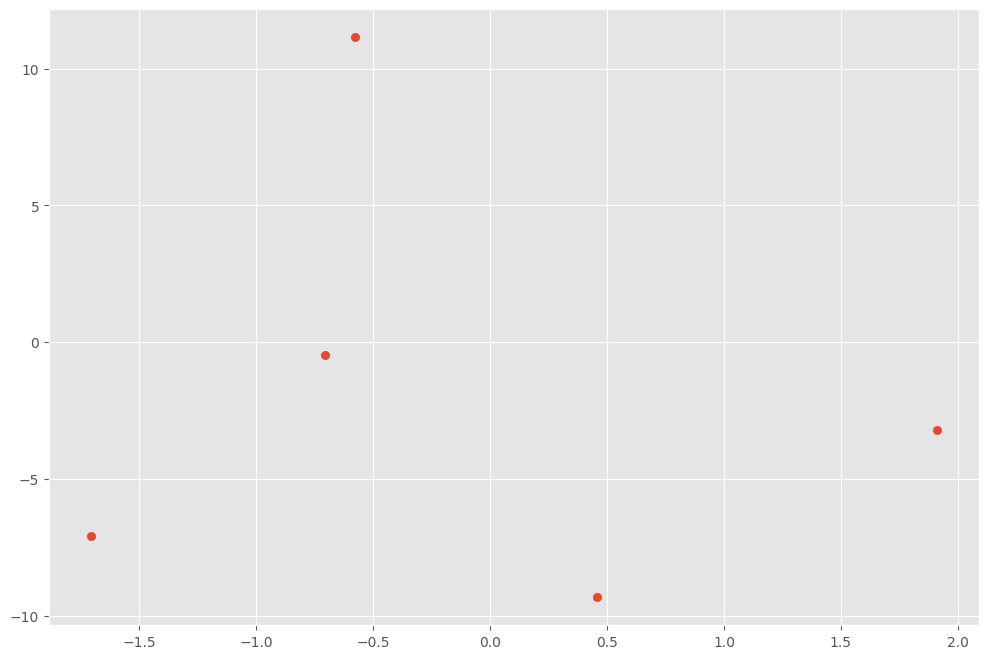

In [235]:
x = np.random.randn(5)
y = np.random.randn(5)
z = 10 * x - y
# z = - 10 * y

plt.scatter(y, z)
plt.show()

In [236]:
dataset = np.vstack([x, y, z]).T
dataset_norm = preprocessing.scale(dataset)
dataset_cov = (dataset_norm.T @ dataset_norm) / (dataset.shape[0] - 1)

In [237]:
dataset

array([[-0.11704504, -0.70561985, -0.46483053],
       [-0.88672739,  0.45884534, -9.32611928],
       [ 1.05676843, -0.57707089, 11.14475521],
       [-0.13169248,  1.90978501, -3.22670981],
       [-0.87810442, -1.70566946, -7.07537472]])

In [189]:
dataset_cov

array([[ 1.01010101,  0.02549492,  1.00552361],
       [ 0.02549492,  1.01010101, -0.07064371],
       [ 1.00552361, -0.07064371,  1.01010101]])

In [193]:
pca = PCA() #svd_solver='randomized')
pca.fit(dataset_norm)
pca_data = pca.transform(dataset_norm)
pca.components_

array([[ 0.70599024, -0.0317741 ,  0.70750844],
       [ 0.06997266,  0.99723467, -0.02503685],
       [-0.70475642,  0.06718202,  0.70626126]])

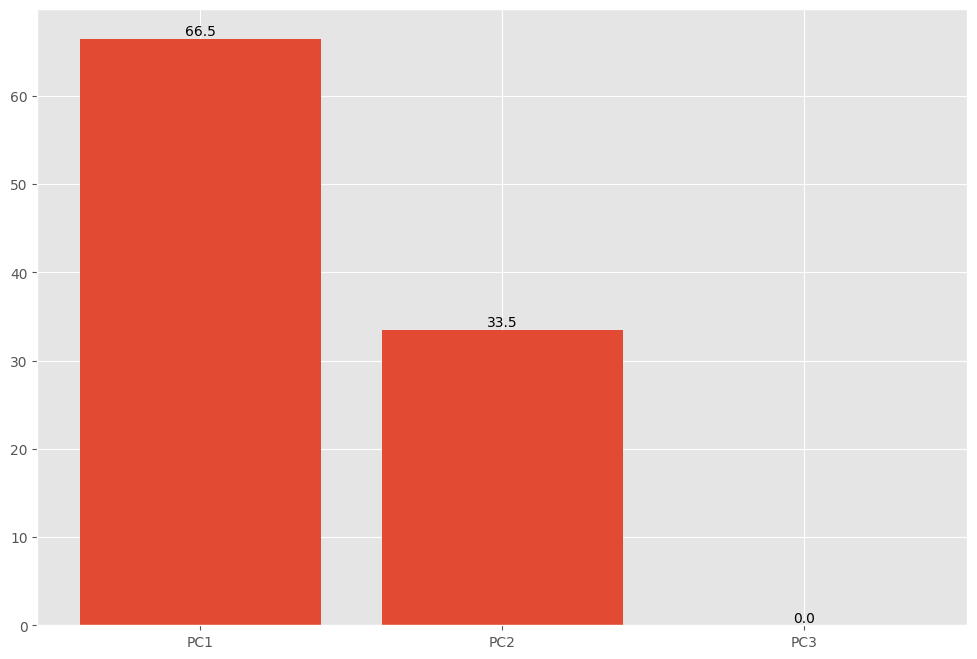

In [191]:
per_var = np.round(pca.explained_variance_ratio_ * 100, decimals=1)[:10]
per_var_names = [f'PC{i+1}' for i in range(len(per_var))]

p = plt.bar(per_var_names, per_var)
plt.bar_label(p, map(str, per_var))
plt.show()

In [161]:
dataset = np.vstack([x, y]).T
dataset_norm = preprocessing.scale(dataset)
dataset_cov = (dataset_norm.T @ dataset_norm) / dataset.shape[0]
dataset_cov

array([[1.        , 0.15570862],
       [0.15570862, 1.        ]])

In [159]:
cov_mat(dataset_norm)

array([[9.31277394e-01, 1.92184805e-02],
       [1.92184805e-02, 3.96605774e-04]])

In [ ]:
dataset = np.vstack((x, y)).T
dataset_norm = preprocessing.scale(dataset)
cov1 = (dataset_norm.T @ dataset_norm) / dataset.shape[0]
np.round(cov1, decimals=2)

In [164]:
len(dataset.T[0])

100

In [169]:
cov(dataset.T[1], dataset.T[1])

np.float64(1.0644150002423671)

In [ ]:
# Covariance
def cov(x, y):
    xbar, ybar = x.mean(), y.mean()
    return np.sum((x - xbar)*(y - ybar))/(len(x) - 1)

# Covariance matrix
def cov_mat(X):
    return np.array([[cov(X[0], X[0]), cov(X[0], X[1])], \
                     [cov(X[1], X[0]), cov(X[1], X[1])]])

# Calculate covariance matrix 
np.round(cov_mat(X.T), decimals=2)

In [194]:
dataset_norm.T[1].mean()

np.float64(-1.27675647831893e-17)

In [263]:
dataset2 = dataset - dataset.mean(axis=0)
dataset2 = dataset2 / np.sqrt(dataset2.shape[0])
dataset2, np.linalg.norm(dataset2, 'fro')

(array([[ 0.03323474, -0.26013247,  0.59247988],
        [-0.31097767,  0.2606322 , -3.37040892],
        [ 0.55818008, -0.20264362,  5.78444447],
        [ 0.02668421,  0.90951214, -0.64267008],
        [-0.30712136, -0.70736825, -2.36384535]]),
 np.float64(7.292457271747727))

In [264]:
u, s, v = np.linalg.svd(dataset2)

In [265]:
u.shape, s.shape, v.shape

((5, 5), (3,), (3, 3))

In [266]:
u

array([[-0.08324917, -0.2030317 ,  0.43237647, -0.18394105,  0.85502279],
       [ 0.47148136,  0.15277775, -0.51427659, -0.67138174,  0.19781414],
       [-0.80875692, -0.06108127, -0.55097954, -0.11230416,  0.16121613],
       [ 0.09137878,  0.735928  , -0.20286283,  0.50326428,  0.39450176],
       [ 0.32914596, -0.62459278, -0.45148466,  0.49952487,  0.21950697]])

In [267]:
s

array([7.18926269e+00, 1.22247089e+00, 9.52627985e-17])

In [268]:
v

array([[-0.09729347,  0.02207614, -0.99501087],
       [ 0.10070662,  0.99484105,  0.01222515],
       [ 0.99014754, -0.09901475, -0.09901475]])

In [270]:
dataset_norm = preprocessing.scale(dataset)
np.linalg.svd(dataset_norm).S

array([3.15334978e+00, 2.24864074e+00, 4.94597182e-16])

In [347]:
dataset3 = dataset - dataset.mean(axis=0)

In [348]:
dataset3_cov = (dataset3.T @ dataset3) / (dataset3.shape[0]-1)
np.round(dataset3_cov, decimals=3)

array([[ 6.3100e-01,  4.8000e-02,  6.2570e+00],
       [ 4.8000e-02,  1.8800e+00, -1.3960e+00],
       [ 6.2570e+00, -1.3960e+00,  6.3964e+01]])

In [349]:
dataset3_Y = dataset3 / np.sqrt(dataset.shape[0] - 1)

In [350]:
eval, evec = np.linalg.eig(dataset3_cov)

In [351]:
ppp = PCA()
ppp.fit(dataset3)

PCA()

In [352]:
u, s, v = np.linalg.svd(dataset3_Y)

In [386]:
u_, s_, v_ = np.linalg.svd(dataset3_cov.T)

In [353]:
evec.T, np.round(eval, decimals=4)

(array([[ 0.09729347, -0.02207614,  0.99501087],
        [ 0.99014754, -0.09901475, -0.09901475],
        [-0.10070662, -0.99484105, -0.01222515]]),
 array([64.6069,  0.    ,  1.868 ]))

In [354]:
ppp.components_, np.round(ppp.explained_variance_, decimals=4)

(array([[ 0.09729347, -0.02207614,  0.99501087],
        [ 0.10070662,  0.99484105,  0.01222515],
        [ 0.99014754, -0.09901475, -0.09901475]]),
 array([64.6069,  1.868 ,  0.    ]))

In [355]:
v, np.round(s*s, decimals=4)

(array([[-0.09729347,  0.02207614, -0.99501087],
        [ 0.10070662,  0.99484105,  0.01222515],
        [-0.99014754,  0.09901475,  0.09901475]]),
 array([64.6069,  1.868 ,  0.    ]))

In [385]:
v_, np.round(s_*s_, decimals=4)

(array([[-0.09729347,  0.02207614, -0.99501087],
        [-0.10070662, -0.99484105, -0.01222515],
        [ 0.99014754, -0.09901475, -0.09901475]]),
 array([4.174048e+03, 3.489600e+00, 0.000000e+00]))

In [374]:
dataset3_norm = preprocessing.scale(dataset)
dataset3_norm_Y = dataset3_norm / np.sqrt(dataset.shape[0] - 1)

In [375]:
ppp2 = PCA()
ppp2.fit(dataset3_norm)

PCA()

In [376]:
u2, s2, v2 = np.linalg.svd(dataset3_norm_Y)

In [380]:
ppp2.components_, np.round(ppp2.explained_variance_, decimals=4)

(array([[ 0.70324948, -0.05962755,  0.70843823],
        [ 0.12756956,  0.99088686, -0.04323464],
        [-0.69940416,  0.12077989,  0.70444733]]),
 array([2.4859, 1.2641, 0.    ]))

In [378]:
v2, np.round(s2*s2, decimals=4)

(array([[-0.70324948,  0.05962755, -0.70843823],
        [ 0.12756956,  0.99088686, -0.04323464],
        [-0.69940416,  0.12077989,  0.70444733]]),
 array([2.4859, 1.2641, 0.    ]))

In [388]:
X = dataset3.T

In [391]:
A = X @ X.T

In [399]:
A @ A.T

array([[  632.75218449,  -137.85083981,  6465.37268468],
       [ -137.85083981,    87.80676477, -1466.31516283],
       [ 6465.37268468, -1466.31516283, 66120.04200965]])

In [400]:
A.T @ A

array([[  632.75218449,  -137.85083981,  6465.37268468],
       [ -137.85083981,    87.80676477, -1466.31516283],
       [ 6465.37268468, -1466.31516283, 66120.04200965]])

NameError: name 'decimal' is not defined

In [ ]:
for i in 